## Set Up

In [138]:
# python3 -m venv .venv
# source .venv/bin/activate
# pip install -r requirements.txt
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
rand_state = 9

In [139]:
# Load dataframe with health features
heart_df = pd.read_csv("heart_dataset.csv")
print(heart_df.shape)

(1025, 14)


In [140]:
# target feature 1 indicates presence of heart disease
heart_df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
783,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
676,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
455,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1


In [141]:
# separate features and labels
x, y = heart_df.drop('target', axis=1), heart_df['target']
# split records into training and testing populations
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = rand_state)

## Model Assortment

### Scale Insensitive Models

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [144]:
nb_clsfr = GaussianNB()
nb_clsfr.fit(x_train, y_train)

GaussianNB()

In [145]:
gb_clsfr = GradientBoostingClassifier()
gb_clsfr.fit(x_train, y_train)

GradientBoostingClassifier()

### Sale Sensitive Models

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
# Not scaling y data because model only trains on input x data
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [148]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(x_train_scaled, y_train)

LogisticRegression()

In [149]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

## Evaluate Model Accuracies

In [150]:
print("Random Forest Accuracy: " + str(forest.score(x_test, y_test)))
print("Gaussian Naive Bayes Accuracy: " + str(nb_clsfr.score(x_test, y_test)))
print("Gradient Boosting Accuracy: " + str(gb_clsfr.score(x_test, y_test)))
print("K Nearest Neighbors Accuracy: " + str(knn.score(x_test_scaled, y_test)))
print("Logistic Regression Accuracy: " + str(logr.score(x_test_scaled, y_test)))
print("SVC Accuracy: " + str(svc.score(x_test_scaled, y_test)))

Random Forest Accuracy: 0.9805194805194806
Gaussian Naive Bayes Accuracy: 0.8603896103896104
Gradient Boosting Accuracy: 0.9642857142857143
K Nearest Neighbors Accuracy: 0.8668831168831169
Logistic Regression Accuracy: 0.8733766233766234
SVC Accuracy: 0.9383116883116883


In [151]:
# Accuracy - model's overall correctness in predicting across all classes
# Precision - how often a positive prediction is correct  (minimize false positives)
# Recall - model's ability to find all positive instances (minimize false negatives)
# In heart disease context, recall may be more important than precision

In [152]:
from sklearn.metrics import recall_score
print("Recall Scores Across Models:")
y_preds = forest.predict(x_test)
print('Forest: ' + str(recall_score(y_test, y_preds)))
y_preds = nb_clsfr.predict(x_test)
print('Gaussian Naive Bayes: ' + str(recall_score(y_test, y_preds)))
y_preds = gb_clsfr.predict(x_test)
print('Gradient Boosting: ' + str(recall_score(y_test, y_preds)))
y_preds = knn.predict(x_test_scaled)
print('K Nearest Neighbors: ' + str(recall_score(y_test, y_preds)))
y_preds = logr.predict(x_test_scaled)
print('Logistic Regression: ' + str(recall_score(y_test, y_preds)))
y_preds = svc.predict(x_test_scaled)
print('SVC: ' + str(recall_score(y_test, y_preds)))

Recall Scores Across Models:
Forest: 0.9813664596273292
Gaussian Naive Bayes: 0.9192546583850931
Gradient Boosting: 0.9813664596273292
K Nearest Neighbors: 0.8695652173913043
Logistic Regression: 0.9192546583850931
SVC: 0.9565217391304348


In [153]:
# Receiver Operating Characteristic (ROC) curve - visualizes performance of a binary classification model at various 
# thresholds by plotting the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity).
# Helps evaluate ability to differentiate positive and negative classes
# Higher Area under the Curve (AUC) means better model performance in class distinguishing

/Users/charlotteverity/Desktop/Personal Projects/Heart Disease Classifier/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7458063970929987


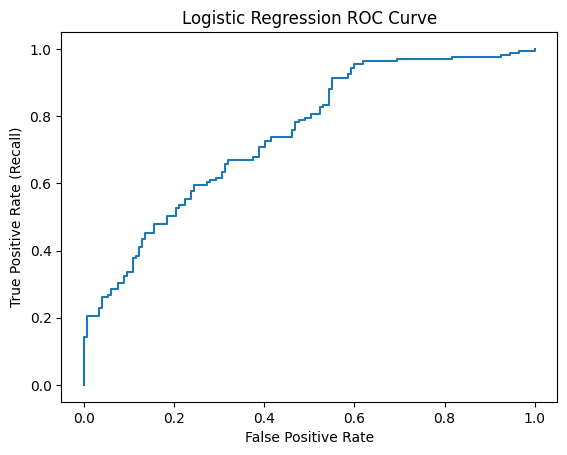

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = logr.predict_proba(x_test)[:, 1]
fpr, tpr, threshs = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Logistic Regression ROC Curve")
print(roc_auc_score(y_test, y_probs))
plt.show()

0.9986056534415009


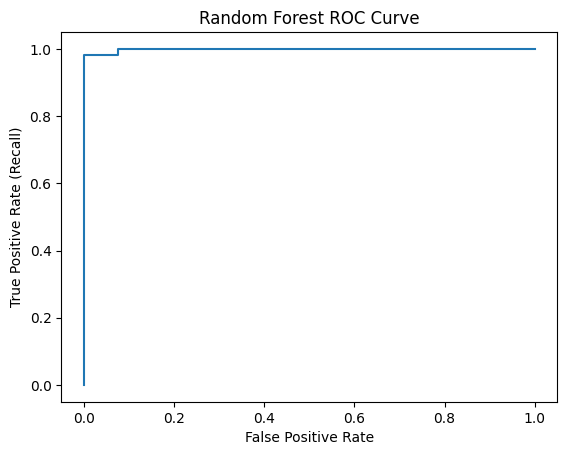

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = forest.predict_proba(x_test)[:, 1]
fpr, tpr, threshs = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Random Forest ROC Curve")
print(roc_auc_score(y_test, y_probs))
plt.show()

In [156]:
roc_auc_score(y_test, y_probs)

np.float64(0.9986056534415009)

In [157]:
# Choosing to move forward with random forest classifier because it has the 
# greatest accuracy and recall scores

## Hyperparameter Tuning

In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'n_estimators': [100, 200, 500],
 # 'max_depth': [None, 10, 20, 30],
 # 'min_samples_split': [2, 5, 10],
 # 'min_samples_leaf': [1, 2, 4],
 # 'max_features': ['sqrt', 'log2', None]
}

In [169]:
# 3-fold cross-validation - split into 3 folds, 2 for training, 1 for testing
# n_jobs: number of processes to run in parallel for this task, -1 indicates all available
forest = RandomForestClassifier(n_jobs=-1, random_state = rand_state)
grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs = -1, verbose=2)

In [170]:
# Trying each combination of parameters
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=100; total time=   0.4s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=500; total time=   1.4s
[CV] END ...................................n_estimators=500; total time=   1.4s
[CV] END ...................................n_estimators=500; total time=   1.1s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500]},
             verbose=2)

In [171]:
best_forest = grid_search.best_estimator_
display(best_forest)
print(best_forest.get_params())

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=9)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 9, 'verbose': 0, 'warm_start': False}


## Feature Importance

In [172]:
feat_importance = best_forest.feature_importances_
features = best_forest.feature_names_in_
importance_df = pd.DataFrame({'feature': features, 'importance': feat_importance})
importance_df = importance_df.sort_values("importance", ascending=False)
display(importance_df.head())

,feature,importance
2,cp,0.130185
11,ca,0.121135
7,thalach,0.115305
9,oldpeak,0.113180
12,thal,0.111233


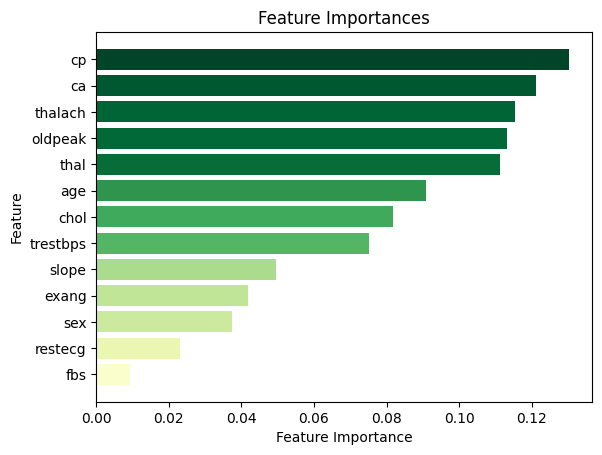

In [173]:
sorted_idx = np.argsort(feat_importance)
sorted_features = features[sorted_idx]
sorted_importances = feat_importance[sorted_idx]
colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

<Axes: >

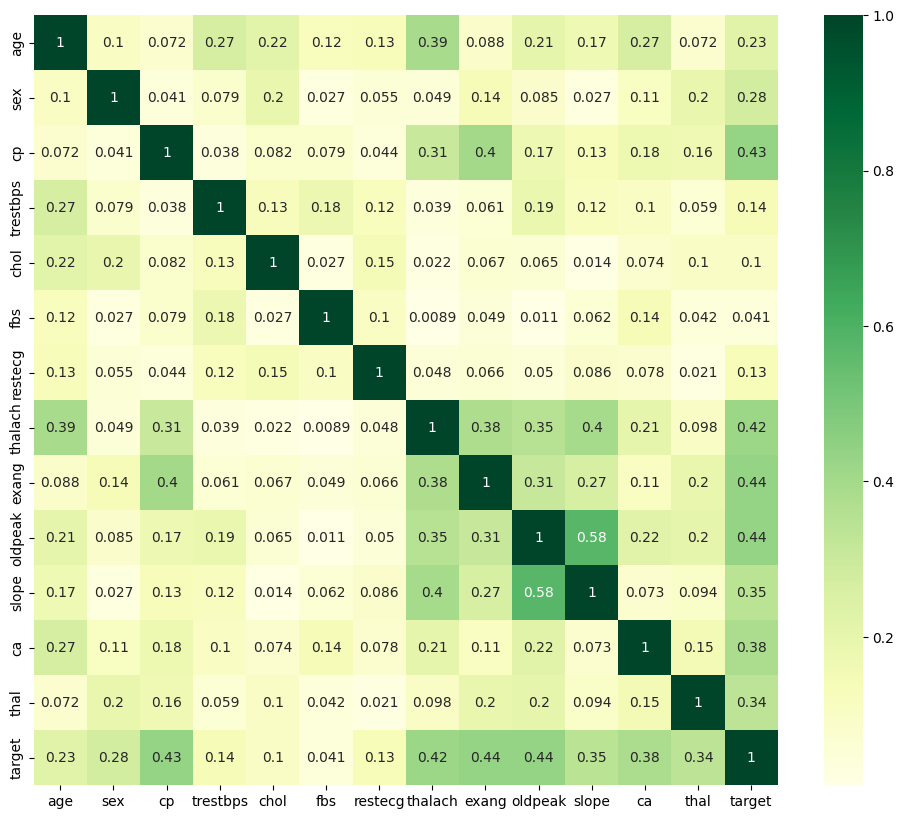

In [174]:
# strongest correlation with target variable are with exang (exercise 
# induced angina) and oldpeak (ST depression induced by exercise relative to rest)
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(abs(heart_df.corr()), annot=True, cmap='YlGn')

In [175]:
best_forest.score(x_test, y_test)

0.9805194805194806

0.9996197236658639


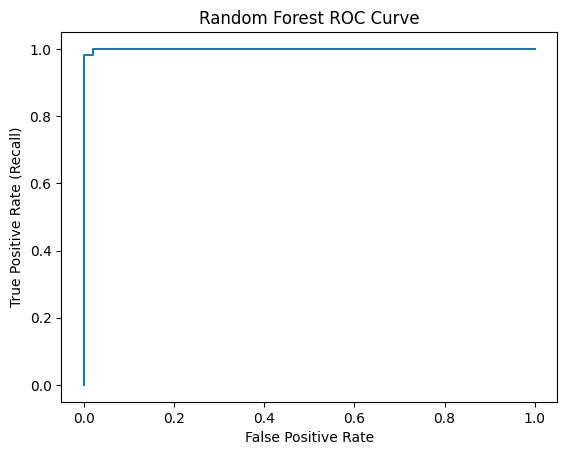

In [176]:
y_probs = best_forest.predict_proba(x_test)[:, 1]
fpr, tpr, threshs = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Random Forest ROC Curve")
print(roc_auc_score(y_test, y_probs))
plt.show()

In [177]:
print("Recall Scores Across Models:")
y_preds = best_forest.predict(x_test)
print('Forest: ' + str(recall_score(y_test, y_preds)))

Recall Scores Across Models:
Forest: 0.9813664596273292


## Conclusion

In [ ]:
# Most important features predicting heart disease
# Type of chest pain, maximum heart rate achieved, 
# the slope of the peak exercise ST segment